## This is a demo for Linear Regression with multiple features and scikit-learn

Importing Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy, math


file_path = "/content/sample_data/housing_prices_full.csv"

Initiating Training Data 1

In [48]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
Y_train = np.array([460, 232, 178])



print(f"X Shape : {X_train.shape} , X Type : {type(X_train)}")

print(X_train)
print(f"Y Shape : {Y_train.shape} , Y Type : {type(Y_train)}")

print(Y_train)

X Shape : (3, 4) , X Type : <class 'numpy.ndarray'>
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
Y Shape : (3,) , Y Type : <class 'numpy.ndarray'>
[460 232 178]


Initiating weights w and bias b

In [49]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


Define a method for Single prediction element by element

In [50]:
def predict_element_by_element(X_train, w_init, b_init):
  val = 0
  for i in range(X_train.shape[0]):
    val = val + w_init[i] * X_train[i]

  val = val + b_init
  return val


Predict Price for a training data

In [51]:

x_vec = X_train[0,:]
price = predict_element_by_element(X_train[0], w_init, b_init)

print(price)

459.9999976194083


Single Prediction using vector dot product

In [52]:
def predict_dot_product(X_train, w_init, b_init):
  val = np.dot(X_train, w_init) + b_init
  return val

In [53]:
x_vec = X_train[0,:]
price = predict_dot_product(x_vec, w_init, b_init)

print(price)

459.9999976194083


Create a cost computing function

In [54]:
def calculate_cost(X_train, Y_train, w_init, b_init):
  cost = 0
  n = X_train.shape[0]
  for i in range(n):
    x_price = np.dot(w_init,X_train[i]) + b_init
    diff = (Y_train[i] - x_price) ** 2
    cost = cost + diff
  return cost / (2 * n)


Calculate Cost for our training data

In [55]:
total_cost = calculate_cost(X_train, Y_train, w_init, b_init)

print(total_cost)

1.5578904428966628e-12


Define a method to compute gradient

In [56]:
def compute_gradient(X_train, Y_train,w,b):
  m,n = X_train.shape
  dj_dw = np.zeros((n),)
  dj_db = 0
  for i in range(m):
    err = (np.dot(X_train[i], w) + b) - Y_train[i]
    for j in range(n):
      dj_dw[j] = dj_dw[j] +  err * X_train[i,j]
    dj_db = dj_db + err

  dj_dw = dj_dw / m
  dj_db = dj_db / m
  return dj_dw, dj_db

Calculate a gradient for a sample data

In [57]:
gradient = compute_gradient(X_train, Y_train,w_init, b_init)

print(gradient)

(array([-2.73e-03, -6.27e-06, -2.22e-06, -6.92e-05]), np.float64(-1.6739251501955248e-06))


Implement a method for Gradient Descent

In [58]:
def gradient_descent(X_train, Y_train, w_init, b_init, alpha, num_iterations,cost_function, gradient_function):
  J_history = []
  w = copy.deepcopy(w_init)  #avoid modifying global w within function
  b = b_init

  for i in range(num_iterations):
    dj_dw, dj_db = compute_gradient(X_train, Y_train,w, b)
    w = w - alpha * dj_dw
    b = b - alpha * dj_db
    J_history.append(cost_function(X_train, Y_train,w,b))
    if i% math.ceil(num_iterations / 10) == 0:
      print(f"Iteration {i:4d}: Cost {J_history[-1]:4.2f}   ")
  return w, b, J_history






Test it on a data

In [59]:
w = np.zeros_like(w_init)
b = 0.

w_final ,b_final , J_history = gradient_descent(X_train, Y_train, w, b, 5.0e-7, 1000, calculate_cost, compute_gradient)

print(w_final)
print(b_final)
# print(J_history)

m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {Y_train[i]}")

Iteration    0: Cost 2529.46   
Iteration  100: Cost 695.99   
Iteration  200: Cost 694.92   
Iteration  300: Cost 693.86   
Iteration  400: Cost 692.81   
Iteration  500: Cost 691.77   
Iteration  600: Cost 690.73   
Iteration  700: Cost 689.71   
Iteration  800: Cost 688.70   
Iteration  900: Cost 687.69   
[ 0.2   0.   -0.01 -0.07]
-0.002235407530932535
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


Plot a graph

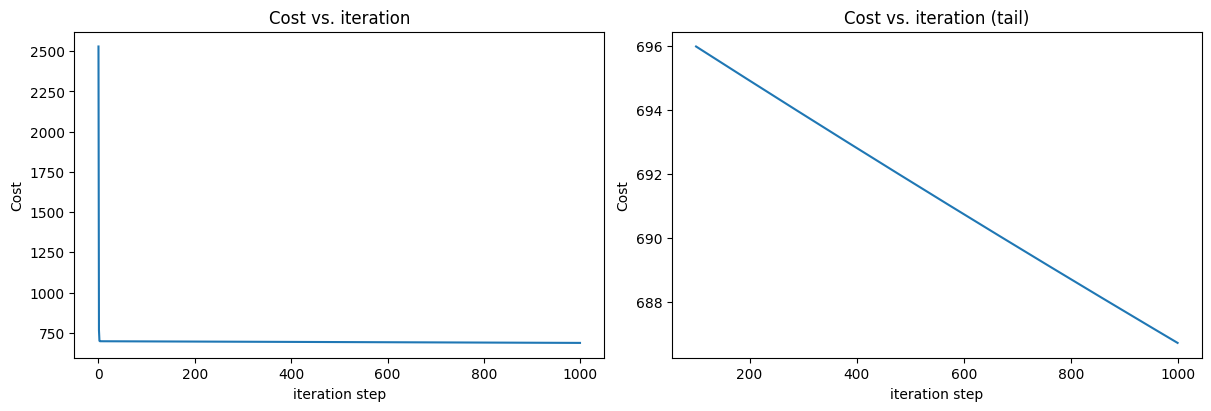

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_history)
ax2.plot(100 + np.arange(len(J_history[100:])), J_history[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()

Define a method for Z-Score Normaliztion

In [61]:
def z_score(X):
  mu = np.mean(X, axis = 0)
  sigma = np.std(X, axis = 0)

  X_norm = (X - mu) / sigma
  return mu, sigma , X_norm

Calculate Z-Scores of features and plot graphs for comparison

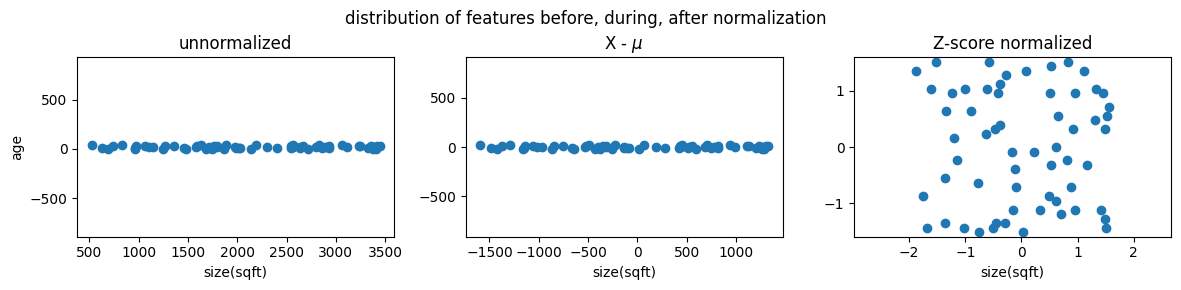

In [62]:
X_features = ['size(sqft)','bedrooms','floors','age']

X_train = pd.read_csv(file_path)

mu, sigma , X_norm = z_score(X_train)
# print(X_train)

# print(mu)
# print(sigma)
# print(X_norm)


X_mean = X_train - mu
X_norm = X_mean / sigma

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[X_features[0]], X_train[X_features[3]])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[X_features[0]], X_mean[X_features[3]])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[X_features[0]], X_norm[X_features[3]])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()


Printing Means and Variences

In [63]:
X_mu, X_sigma, X_norm = z_score(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")




X_mu = size(sqft)      2116.550000
bedrooms           2.900000
floors             1.450000
age               18.983333
price         445310.966667
dtype: float64, 
X_sigma = size(sqft)       850.011028
bedrooms           1.422439
floors             0.497494
age               12.542583
price         171269.843088
dtype: float64
Peak to Peak range by column in Raw        X:size(sqft)      2924
bedrooms           4
floors             1
age               38
price         597866
dtype: int64
Peak to Peak range by column in Normalized X:size(sqft)    3.439955
bedrooms      2.812071
floors        2.010076
age           3.029679
price         3.490784
dtype: float64


Running Gradient Descent on normalized data

In [64]:

X_features = ['size(sqft)','bedrooms','floors','age']

# Load the full dataset from housing_prices.csv
housing_df = pd.read_csv(file_path)


# Separate features (X) and target (Y)
# Assuming all but the last column are features and the last column is the target
X_train_full = housing_df.iloc[:, :-1]
Y_train_full = housing_df.iloc[:, -1].values # Convert target to numpy array

# Z-score normalize the features
mu, sigma , X_norm = z_score(X_train_full)

# Convert the normalized DataFrame to a NumPy array for compatibility with compute_gradient
X_norm_array = X_norm.values

y_mu,y_sigma,y_norm_array = z_score(Y_train_full)

print(f"y_norm : {y_norm_array[:5]}")

# print(X_norm_array[:5])

# print(X_norm_array)

# # Initialize weights and bias for the new dataset.
# # It's good practice to start with zeros for a new training run.
b_init = 0.
w_init = np.zeros(X_norm_array.shape[1]) # Initialize w with zeros, matching the number of features
w = w_init
b = b_init

# # Run gradient descent with the normalized features and the correct target variable
w_final_data, b_final_data, J_history = gradient_descent(X_norm_array, y_norm_array, w, b, 0.01, 1000, calculate_cost, compute_gradient)


print(f"W: {w_final_data}")
print(f"B: {b_final_data}")

x_house = np.array([1360, 4, 1, 27])


# Normalised input via mu and sigma of training set
x_house_norm = (x_house - mu) / sigma


# Predicting normalised price
y_norm_pred =  np.dot(x_house_norm, w_final_data) + b_final_data


# Denormalising price basis input prices
price = y_norm_pred * y_sigma + y_mu
print(f"Price of a house with 1360 sqft, 4 bedrooms, 1 floor, 27 years old = ${price :0.2f}")


diff = Y_train_full[0] - price

delta = (diff/price) * 100
print(f" delta: {delta: 0.2f}%")




y_norm : [-0.84 -0.32 -0.62 -0.73  0.05]
Iteration    0: Cost 0.49   
Iteration  100: Cost 0.06   
Iteration  200: Cost 0.01   
Iteration  300: Cost 0.00   
Iteration  400: Cost 0.00   
Iteration  500: Cost 0.00   
Iteration  600: Cost 0.00   
Iteration  700: Cost 0.00   
Iteration  800: Cost 0.00   
Iteration  900: Cost 0.00   
W: [ 0.98  0.05  0.03 -0.02]
B: 1.273333290659672e-16
Price of a house with 1360 sqft, 4 bedrooms, 1 floor, 27 years old = $294674.75
 delta:  2.07%


Feature Engineering Demo

(20, 1)
(1,)
[0.]
Iteration    0: Cost 14190.32   
Iteration 1000: Cost 13863.61   
Iteration 2000: Cost 13544.92   
Iteration 3000: Cost 13234.04   
Iteration 4000: Cost 12930.80   
Iteration 5000: Cost 12635.00   
Iteration 6000: Cost 12346.45   
Iteration 7000: Cost 12064.99   
Iteration 8000: Cost 11790.43   
Iteration 9000: Cost 11522.61   


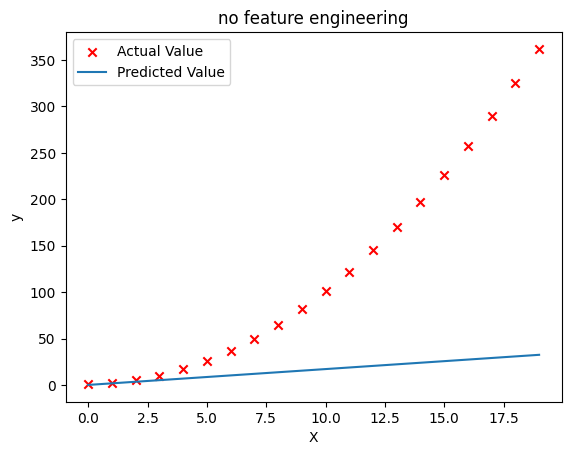

In [65]:
x = np.arange(0,20,1)



# print(f"x: {x}")

b_init = 0

X = x.reshape(-1,1)

w_init = np.zeros(X.shape[1]) # Ensure w_init matches the number of features in X

y = 1 + (x ** 2) # Ensure y is a 1D array

print(X.shape)
print(w_init.shape)

print(w_init)


model_w,model_b, J_history = gradient_descent(X,y,w_init,b_init,1e-7, 10000, calculate_cost, compute_gradient)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("no feature engineering")
plt.plot(x,X@model_w + model_b, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

With feature scaling, gradient descent converges way faster in below with same w and b

(20, 2)
(2,)
[0. 0.]
Iteration    0: Cost 14110.59   
Iteration 1000: Cost 49.38   
Iteration 2000: Cost 0.31   
Iteration 3000: Cost 0.14   
Iteration 4000: Cost 0.14   
Iteration 5000: Cost 0.14   
Iteration 6000: Cost 0.14   
Iteration 7000: Cost 0.14   
Iteration 8000: Cost 0.14   
Iteration 9000: Cost 0.14   


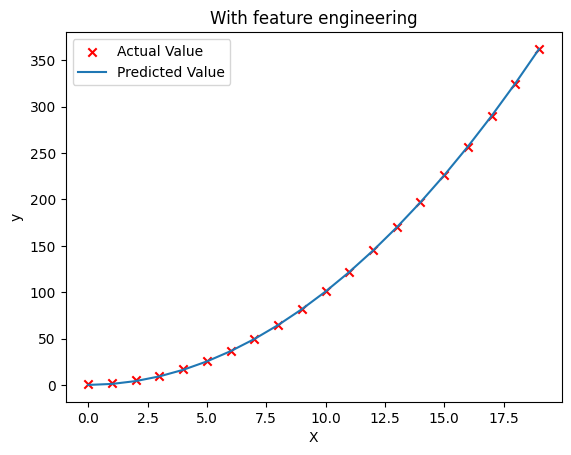

In [66]:
x = np.arange(0,20,1)

# print(f"x: {x}")

b_init = 0

X = x.reshape(-1,1)
X = np.c_[x, x**2]

w_init = np.zeros(X.shape[1]) # Ensure w_init matches the number of features in X

y = 1 + (x ** 2) # Ensure y is a 1D array

print(X.shape)
print(w_init.shape)

print(w_init)


model_w,model_b, J_history = gradient_descent(X,y,w_init,b_init,1e-7, 10000, calculate_cost, compute_gradient)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("With feature engineering")
plt.plot(x,X@model_w + model_b, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

Linear Regression Using scikit-learn!

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
np.set_printoptions(precision=2)


file_path = "/content/sample_data/housing_prices_full.csv"


data = pd.read_csv(file_path)


X_features = ['size(sqft)','bedrooms','floors','age']

X_train = data[X_features]
Y_train = data['price']

scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)


print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

sgdr = SGDRegressor(max_iter = 1000)

sgdr.fit(X_norm, Y_train)

print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

b_norm = sgdr.intercept_
w_norm = sgdr.coef_

print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

y_predict_sgd = sgdr.predict(X_norm) # extract predicted value from regression method itself

y_predict = np.dot(X_norm,w_norm) + b_norm # calculate value from w_norm and b_norm calculated via SGDR


print(f"prediction using np.dot() and sgdr.predict match: {(y_predict_sgd == y_predict).all()}")

print(f"Prediction on training set:\n{y_predict[:4]}" )
print(f"Target values \n{Y_train[:4]}")


Peak to Peak range by column in Raw        X:size(sqft)    2924
bedrooms         4
floors           1
age             38
dtype: int64
Peak to Peak range by column in Normalized X:[3.44 2.81 2.01 3.03]
number of iterations completed: 147, number of weight updates: 8821.0
model parameters:                   w: [168328.59   7772.26   4691.05  -4051.31], b:[445305.26]
prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[294662.66 387041.2  348543.33 323192.83]
Target values 
0    300775
1    390654
2    338397
3    319700
Name: price, dtype: int64
